In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.imputation import MeanMedianImputer
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.outliers import OutlierTrimmer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from feature_engine.encoding import CountFrequencyEncoder
import geopy.distance
from geopy.distance import geodesic
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#  Load and  understand data

In [2]:
train_data=pd.read_csv(r"C:\Users\shikh\OneDrive\Desktop\Machine learning\archive (9)\train.csv")

In [3]:
test_data=pd.read_csv(r"C:\Users\shikh\OneDrive\Desktop\Machine learning\archive (9)\test.csv")

In [4]:
train_data.nunique()

ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               23
Delivery_person_Ratings           29
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      177
Time_Order_picked                193
Weatherconditions                  7
Road_traffic_density               5
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                5
Festival                           3
City                               4
Time_taken(min)                   45
dtype: int64

In [5]:
train_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [6]:
train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

### Statistical Summary

In [6]:
train_data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [7]:
train_data.multiple_deliveries.unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [8]:
train_data[train_data["Vehicle_condition"]==0]['Type_of_vehicle'].value_counts()

motorcycle     15009
Name: Type_of_vehicle, dtype: int64

In [9]:
train_data[train_data["Vehicle_condition"]==3]['Type_of_vehicle'].value_counts()

electric_scooter     188
scooter              174
motorcycle            90
bicycle               68
Name: Type_of_vehicle, dtype: int64

In [10]:
train_data['multiple_deliveries'].value_counts()

1       28159
0       14095
2        1985
NaN       993
3         361
Name: multiple_deliveries, dtype: int64

In [11]:
train_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [12]:
train_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Cleaning steps

In [13]:
## replace named NAN values with np.nan
def replace_np_nan(data,column_name):
    data[column_name]=np.where(data[column_name].astype(str).str.lower().str.contains("nan"),np.nan,data[column_name])

In [14]:
for i in train_data.columns:
    replace_np_nan(train_data,i)

In [15]:
for i in test_data.columns:
    replace_np_nan(test_data,i)

In [16]:
## dont need condition word in weather condition column
train_data.Weatherconditions=train_data.Weatherconditions.str.replace("conditions ","").str.strip()

test_data.Weatherconditions=test_data.Weatherconditions.str.replace("conditions ","").str.strip()

In [17]:
#Update Column Names with lower letters
train_data.columns = train_data.columns.str.lower()

test_data.columns = test_data.columns.str.lower()

In [18]:
#Drop ID Columns which won't be use for building model

train_data.drop("id",axis=1,inplace=True)
test_data.drop("id",axis=1,inplace=True)

train_data.drop("delivery_person_id",axis=1,inplace=True)
test_data.drop("delivery_person_id",axis=1,inplace=True)

In [19]:
## change time_taken(min) columns to integer
train_data['time_taken(min)']=train_data['time_taken(min)'].str.split(")").str[1].astype(int)

In [20]:
train_data

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2.0,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1.0,Meal,motorcycle,0,No,Metropolitian,32
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0.0,Buffet,motorcycle,1,No,Metropolitian,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1.0,Drinks,scooter,0,No,Metropolitian,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0.0,Snack,motorcycle,1,No,Metropolitian,26


In [21]:
train_data.duplicated().sum()

0

In [22]:
test_data.duplicated().sum()

0

In [23]:
train_data.select_dtypes(exclude="object").isnull().sum()

restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
vehicle_condition              0
time_taken(min)                0
dtype: int64

In [24]:
train_data.select_dtypes(include="object").isnull().sum()

delivery_person_age        1854
delivery_person_ratings    1908
order_date                    0
time_orderd                1731
time_order_picked             0
weatherconditions           616
road_traffic_density        601
type_of_order                 0
type_of_vehicle               0
multiple_deliveries         993
festival                    228
city                       1200
dtype: int64

In [25]:
## update data dtypes
train_data[['multiple_deliveries','delivery_person_age','delivery_person_ratings']]=train_data[['multiple_deliveries','delivery_person_age','delivery_person_ratings']].astype(float)
test_data[['multiple_deliveries','delivery_person_age','delivery_person_ratings']]=test_data[['multiple_deliveries','delivery_person_age','delivery_person_ratings']].astype(float)
 
train_data['order_date']=pd.to_datetime(train_data['order_date'],format="%d-%m-%Y")
test_data['order_date']=pd.to_datetime(test_data['order_date'],format="%d-%m-%Y")

In [26]:
train_data.dtypes

delivery_person_age                   float64
delivery_person_ratings               float64
restaurant_latitude                   float64
restaurant_longitude                  float64
delivery_location_latitude            float64
delivery_location_longitude           float64
order_date                     datetime64[ns]
time_orderd                            object
time_order_picked                      object
weatherconditions                      object
road_traffic_density                   object
vehicle_condition                     float64
type_of_order                          object
type_of_vehicle                        object
multiple_deliveries                   float64
festival                               object
city                                   object
time_taken(min)                         int32
dtype: object

In [27]:
## calculate order_prepare_time and add this column to data
def calculate_time_diff(df):
    df['time_orderd'] = pd.to_timedelta(df['time_orderd'],errors="coerce")
    df['time_order_picked'] = pd.to_timedelta(df['time_order_picked'],errors="coerce")
    
    df['time_order_picked_formatted'] = df['order_date'] + np.where(df['time_order_picked'] < df['time_orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['time_order_picked']
    df['time_ordered_formatted'] = df['order_date'] + df['time_orderd']
    
    df['order_prepare_time'] = (df['time_order_picked_formatted'] - df['time_ordered_formatted']).dt.total_seconds() / 60

In [28]:
calculate_time_diff(train_data)

C:\Users\shikh\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  warnings.warn(


In [29]:
calculate_time_diff(test_data)

C:\Users\shikh\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  warnings.warn(


In [30]:
# drop unnecessary columns related with date
train_data.drop(train_data.iloc[:,7:9],axis=1,inplace=True)
test_data.drop(test_data.iloc[:,7:9],axis=1,inplace=True)

In [31]:
train_data["order_time"]=train_data.time_ordered_formatted.dt.strftime('%H:%M')

In [32]:
test_data["order_time"]=test_data.time_ordered_formatted.dt.strftime('%H:%M')

In [33]:
### calculate distance between restaurant and delivery location and add columns to data
def calculate_distance(df):
    df['distance_km']=np.zeros(len(df))
    restaurant_coordinates=df[['restaurant_latitude','restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['delivery_location_latitude','delivery_location_longitude']].to_numpy()
    df['distance_km'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance_km']= df['distance_km'].astype("str").str.extract('(\d+)').astype("int64")

In [35]:
calculate_distance(train_data)

In [36]:
calculate_distance(test_data)

In [37]:
train_data

,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,weatherconditions,road_traffic_density,vehicle_condition,...,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min),time_order_picked_formatted,time_ordered_formatted,order_prepare_time,order_time,distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,Sunny,High,2.0,...,motorcycle,0.0,No,Urban,24,2022-03-19 11:45:00,2022-03-19 11:30:00,15.0,11:30,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,Stormy,Jam,2.0,...,scooter,1.0,No,Metropolitian,33,2022-03-25 19:50:00,2022-03-25 19:45:00,5.0,19:45,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,Sandstorms,Low,0.0,...,motorcycle,1.0,No,Urban,26,2022-03-19 08:45:00,2022-03-19 08:30:00,15.0,08:30,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,Sunny,Medium,0.0,...,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:10:00,2022-04-05 18:00:00,10.0,18:00,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,Cloudy,High,1.0,...,scooter,1.0,No,Metropolitian,30,2022-03-26 13:45:00,2022-03-26 13:30:00,15.0,13:30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,1.0,...,motorcycle,0.0,No,Metropolitian,32,2022-03-24 11:45:00,2022-03-24 11:35:00,10.0,11:35,1
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,Windy,Jam,0.0,...,motorcycle,1.0,No,Metropolitian,36,2022-02-16 20:10:00,2022-02-16 19:55:00,15.0,19:55,10
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,1.0,...,scooter,0.0,No,Metropolitian,16,2022-03-12 00:05:00,2022-03-11 23:50:00,15.0,23:50,4
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,0.0,...,motorcycle,1.0,No,Metropolitian,26,2022-03-07 13:40:00,2022-03-07 13:35:00,5.0,13:35,6


In [38]:
### drop lattitude longitude columns after calculate distance between restaurant and delivery location
train_data.drop(train_data.iloc[:,2:6],axis=1,inplace=True)
test_data.drop(test_data.iloc[:,2:6],axis=1,inplace=True)

In [39]:
train_data.dtypes

delivery_person_age                   float64
delivery_person_ratings               float64
order_date                     datetime64[ns]
weatherconditions                      object
road_traffic_density                   object
vehicle_condition                     float64
type_of_order                          object
type_of_vehicle                        object
multiple_deliveries                   float64
festival                               object
city                                   object
time_taken(min)                         int32
time_order_picked_formatted    datetime64[ns]
time_ordered_formatted         datetime64[ns]
order_prepare_time                    float64
order_time                             object
distance_km                             int64
dtype: object

In [40]:
## drop time_order_picked_formatted column we create for calculate order prepare time
train_data.drop(train_data.iloc[:,12:14],axis=1,inplace=True)
test_data.drop(test_data.iloc[:,11:13],axis=1,inplace=True)

In [41]:
train_data

,delivery_person_age,delivery_person_ratings,order_date,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min),order_prepare_time,order_time,distance_km
0,37.0,4.9,2022-03-19,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24,15.0,11:30,3
1,34.0,4.5,2022-03-25,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33,5.0,19:45,20
2,23.0,4.4,2022-03-19,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26,15.0,08:30,1
3,38.0,4.7,2022-04-05,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21,10.0,18:00,7
4,32.0,4.6,2022-03-26,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30,15.0,13:30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,2022-03-24,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32,10.0,11:35,1
45589,21.0,4.6,2022-02-16,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36,15.0,19:55,10
45590,30.0,4.9,2022-03-11,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16,15.0,23:50,4
45591,20.0,4.7,2022-03-07,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26,5.0,13:35,6


In [42]:
### drop NAN values same rows of 6 columns
train_data.dropna(subset=['delivery_person_age', 'delivery_person_ratings', 'weatherconditions', 'road_traffic_density','order_prepare_time','order_time'],how="all",inplace=True)

In [43]:
test_data.dropna(subset=['delivery_person_age', 'delivery_person_ratings', 'weatherconditions', 'road_traffic_density','order_prepare_time','order_time'],how="all",inplace=True)

In [44]:
train_data.isnull().sum()

delivery_person_age        1344
delivery_person_ratings    1398
order_date                    0
weatherconditions           106
road_traffic_density         91
vehicle_condition             0
type_of_order                 0
type_of_vehicle               0
multiple_deliveries         982
festival                    225
city                       1181
time_taken(min)               0
order_prepare_time         1221
order_time                 1221
distance_km                   0
dtype: int64

In [45]:
### drop rows where distance from restaurant greater than 20 km
train_data=train_data[train_data["distance_km"]<=20]
test_data=test_data[test_data["distance_km"]<=20]

In [46]:
train_data

,delivery_person_age,delivery_person_ratings,order_date,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min),order_prepare_time,order_time,distance_km
0,37.0,4.9,2022-03-19,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24,15.0,11:30,3
1,34.0,4.5,2022-03-25,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33,5.0,19:45,20
2,23.0,4.4,2022-03-19,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26,15.0,08:30,1
3,38.0,4.7,2022-04-05,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21,10.0,18:00,7
4,32.0,4.6,2022-03-26,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30,15.0,13:30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,2022-03-24,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32,10.0,11:35,1
45589,21.0,4.6,2022-02-16,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36,15.0,19:55,10
45590,30.0,4.9,2022-03-11,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16,15.0,23:50,4
45591,20.0,4.7,2022-03-07,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26,5.0,13:35,6


In [47]:
## we can see that vehicle type bicycle rows is NAN properly. Thats why best choice drop it
train_data=train_data[train_data['type_of_vehicle']!="bicycle "]
test_data=test_data[test_data['type_of_vehicle']!="bicycle "]

In [48]:
train_data.shape,test_data.shape

((44756, 15), (11182, 14))

In [49]:
## delivery person ratings cant be more than 5 thats why drop rows which greater than 5
train_data=train_data[train_data['delivery_person_ratings']!=6]
test_data=test_data[test_data['delivery_person_ratings']!=6]

In [50]:
train_data=train_data[train_data['vehicle_condition']!=3]
test_data=test_data[test_data['vehicle_condition']!=3]

In [51]:
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

# Explotary Data Analysis

### 1. Different type of vehicles time taken to deliver order, depend on traffic density

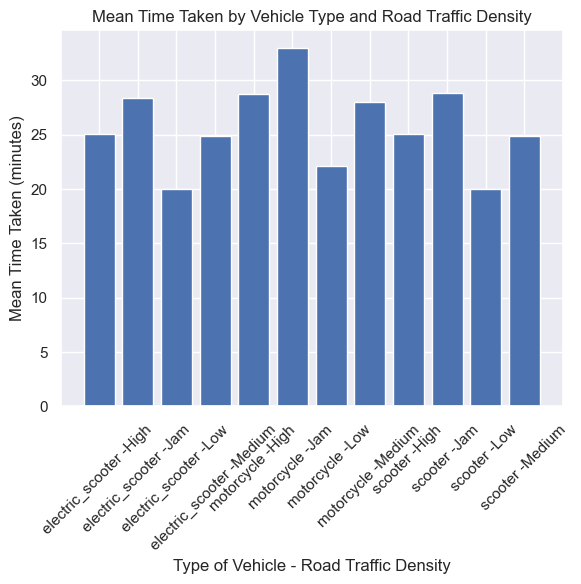

In [42]:
grouped_data = train_data.groupby(["type_of_vehicle", 'road_traffic_density']).mean()['time_taken(min)']

# Convert the grouped data to a DataFrame for easier plotting
plot_data = grouped_data.reset_index()

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(plot_data['type_of_vehicle'] + '-' + plot_data['road_traffic_density'], plot_data['time_taken(min)'])
plt.xlabel('Type of Vehicle - Road Traffic Density')
plt.ylabel('Mean Time Taken (minutes)')
plt.title('Mean Time Taken by Vehicle Type and Road Traffic Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [203]:
### we can see that motorcycle is the worst option than other type of vehicles, which take more time in traffic

### 2. What type of order take more time for preparing?

In [43]:
train_data.groupby("type_of_order").mean()['order_prepare_time']

type_of_order
Buffet     10.025430
Drinks      9.960862
Meal        9.959909
Snack      10.014469
Name: order_prepare_time, dtype: float64

In [208]:
## this table shows that regardless of order type, taking time for preparing order approximately same.

### 3. What are the ratings of delivery persons?

In [44]:
train_data[train_data['delivery_person_ratings']>=4.5].shape[0]/train_data.shape[0]

0.7927216605529211

In [261]:
### we see that about 80 percent of deliveries ratings above 4.5

In [262]:
train_data

,delivery_person_age,delivery_person_ratings,order_date,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min),order_prepare_time,order_time,distance_km
0,37.0,4.9,2022-03-19,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24,15.0,11:30,3
1,34.0,4.5,2022-03-25,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33,5.0,19:45,20
2,23.0,4.4,2022-03-19,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26,15.0,08:30,1
3,38.0,4.7,2022-04-05,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21,10.0,18:00,7
4,32.0,4.6,2022-03-26,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30,15.0,13:30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,2022-03-24,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32,10.0,11:35,1
45589,21.0,4.6,2022-02-16,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36,15.0,19:55,10
45590,30.0,4.9,2022-03-11,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16,15.0,23:50,4
45591,20.0,4.7,2022-03-07,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26,5.0,13:35,6


In [45]:
train_data.groupby(['weatherconditions']).mean()['time_taken(min)']

weatherconditions
Cloudy        28.922378
Fog           28.932667
Sandstorms    25.872481
Stormy        25.866384
Sunny         21.854656
Windy         26.127879
Name: time_taken(min), dtype: float64

### 4. Does the weather condition affect delivering orders?

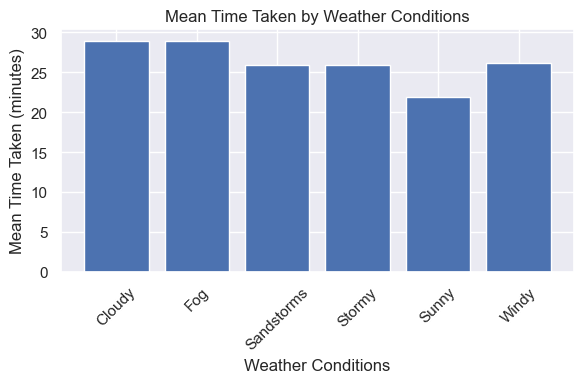

In [46]:
grouped_data2 = train_data.groupby(['weatherconditions']).mean()['time_taken(min)']

# Convert the grouped data to a DataFrame for easier plotting
plot_data = grouped_data2.reset_index()
# Plotting
plt.figure(figsize=(6, 4))
plt.bar(plot_data['weatherconditions'], plot_data['time_taken(min)'])
plt.xlabel('Weather Conditions')
plt.ylabel('Mean Time Taken (minutes)')
plt.title('Mean Time Taken by Weather Conditions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
### this graph shows that sunny weather is so available for delivering or vice versa cloudy and foggy weather 

In [47]:
train_data

,delivery_person_age,delivery_person_ratings,order_date,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min),time_ordered_formatted,order_prepare_time,order_time,distance_km
0,37.0,4.9,2022-03-19,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24,2022-03-19 11:30:00,15.0,11:30,3
1,34.0,4.5,2022-03-25,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33,2022-03-25 19:45:00,5.0,19:45,20
2,23.0,4.4,2022-03-19,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26,2022-03-19 08:30:00,15.0,08:30,1
3,38.0,4.7,2022-04-05,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21,2022-04-05 18:00:00,10.0,18:00,7
4,32.0,4.6,2022-03-26,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30,2022-03-26 13:30:00,15.0,13:30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,2022-03-24,Windy,High,1.0,Meal,motorcycle,0.0,No,Metropolitian,32,2022-03-24 11:35:00,10.0,11:35,1
45589,21.0,4.6,2022-02-16,Windy,Jam,0.0,Buffet,motorcycle,1.0,No,Metropolitian,36,2022-02-16 19:55:00,15.0,19:55,10
45590,30.0,4.9,2022-03-11,Cloudy,Low,1.0,Drinks,scooter,0.0,No,Metropolitian,16,2022-03-11 23:50:00,15.0,23:50,4
45591,20.0,4.7,2022-03-07,Cloudy,High,0.0,Snack,motorcycle,1.0,No,Metropolitian,26,2022-03-07 13:35:00,5.0,13:35,6


### 5. What time gap do the people ordering more?

In [48]:
train_data['order_time'].value_counts()

21:55    460
17:55    455
20:00    446
22:20    445
19:50    444
        ... 
12:25     57
14:15     56
16:00     53
13:20     52
16:30     51
Name: order_time, Length: 176, dtype: int64

In [49]:
count_table = train_data['order_time'].value_counts()

# Sort the count table based on the time index
sorted_table = count_table.sort_index()

# Print the sorted table
pd.DataFrame(sorted_table).tail(12).sum().values

array([4885], dtype=int64)

In [50]:
data=pd.DataFrame(sorted_table)

In [51]:
data=data.reset_index()

In [52]:
data.columns=["order_time","order_counts"]

In [53]:
data[data['order_counts']>300]

,order_time,order_counts
0,00:00,429
100,17:10,412
101,17:15,423
102,17:20,414
103,17:25,431
...,...,...
171,23:35,421
172,23:40,416
173,23:45,404
174,23:50,391


In [54]:
data[data['order_counts']>300]['order_counts'].sum()/train_data.shape[0]

0.7138990784647044

In [427]:
### we see that 71 percent of total orders are between 17:10 and 00:00

### 6. Does workday and weekend affect count of orders?

In [52]:
## create day of week feature to answer this question
train_data['day_of_week']=train_data['order_date'].dt.dayofweek.astype(int) + 1 % 7.

In [53]:
test_data['day_of_week']=test_data['order_date'].dt.dayofweek.astype(int) + 1 % 7.

In [54]:
train_data['day_of_week'].value_counts()

3.0    6971
5.0    6882
4.0    6234
2.0    6221
6.0    6180
7.0    6132
1.0    6088
Name: day_of_week, dtype: int64

In [442]:
### this table shows that day of the week doesnt affect order.

### Comprehension of features correlation

In [55]:
train_data.corr()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken(min),order_prepare_time,distance_km,day_of_week
delivery_person_age,1.000000,-0.117421,-0.001859,0.117826,0.304119,-0.008146,-0.001552,0.008252
delivery_person_ratings,-0.117421,1.000000,0.048977,-0.126528,-0.360804,0.004236,-0.106914,-0.008108
vehicle_condition,-0.001859,0.048977,1.000000,-0.101779,-0.244109,0.006172,0.007295,0.004869
multiple_deliveries,0.117826,-0.126528,-0.101779,1.000000,0.386864,-0.004478,0.126053,-0.001600
time_taken(min),0.304119,-0.360804,-0.244109,0.386864,1.000000,-0.008517,0.319712,0.006795
order_prepare_time,-0.008146,0.004236,0.006172,-0.004478,-0.008517,1.000000,0.001856,-0.005754
distance_km,-0.001552,-0.106914,0.007295,0.126053,0.319712,0.001856,1.000000,0.023557
day_of_week,0.008252,-0.008108,0.004869,-0.001600,0.006795,-0.005754,0.023557,1.000000


# Feature engineering

### 1. Missing value imputation

In [56]:
y_train=train_data['time_taken(min)']

train_data=train_data.drop('time_taken(min)',axis=1)

In [57]:
for i in train_data.select_dtypes(exclude=["object","datetime"]).columns:
    if train_data[i].isnull().sum()>0:
        print(i)

delivery_person_age
delivery_person_ratings
multiple_deliveries
order_prepare_time


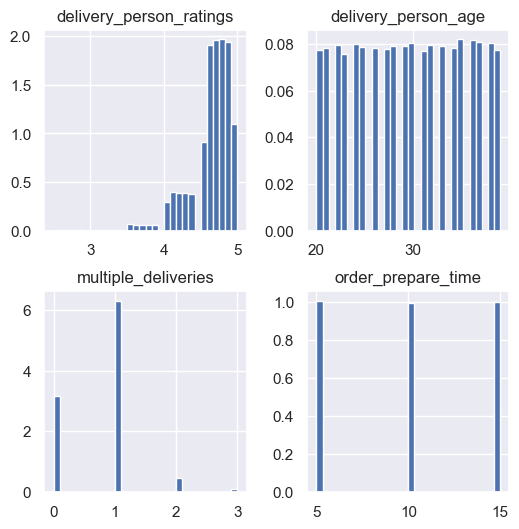

In [58]:
train_data[['delivery_person_ratings','delivery_person_age','multiple_deliveries','order_prepare_time']].hist(bins=30, figsize=(6,6), density=True)
plt.show()

In [146]:
### we see that median imputer methods is best option to impute numeric features

In [59]:
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['delivery_person_ratings','delivery_person_age','multiple_deliveries','order_prepare_time'])
train_data=median_imputer.fit_transform(train_data)

In [60]:
test_data=median_imputer.fit_transform(test_data)

In [61]:
train_data.isnull().sum()

delivery_person_age           0
delivery_person_ratings       0
order_date                    0
weatherconditions            13
road_traffic_density          0
vehicle_condition             0
type_of_order                 0
type_of_vehicle               0
multiple_deliveries           0
festival                    225
city                       1173
order_prepare_time            0
order_time                 1002
distance_km                   0
day_of_week                   0
dtype: int64

In [62]:
## impute categorical features with their mode
train_data['weatherconditions'].fillna(train_data['weatherconditions'].mode()[0], inplace=True)
train_data['festival'].fillna(train_data['festival'].mode()[0], inplace=True)
train_data['city'].fillna(train_data['city'].mode()[0], inplace=True)

In [63]:
test_data['weatherconditions'].fillna(test_data['weatherconditions'].mode()[0], inplace=True)
test_data['festival'].fillna(test_data['festival'].mode()[0], inplace=True)
test_data['city'].fillna(test_data['city'].mode()[0], inplace=True)

In [64]:
train_data.isnull().sum()

delivery_person_age           0
delivery_person_ratings       0
order_date                    0
weatherconditions             0
road_traffic_density          0
vehicle_condition             0
type_of_order                 0
type_of_vehicle               0
multiple_deliveries           0
festival                      0
city                          0
order_prepare_time            0
order_time                 1002
distance_km                   0
day_of_week                   0
dtype: int64

In [65]:
test_data.isnull().sum()

delivery_person_age          0
delivery_person_ratings      0
order_date                   0
weatherconditions            0
road_traffic_density         0
vehicle_condition            0
type_of_order                0
type_of_vehicle              0
multiple_deliveries          0
festival                     0
city                         0
order_prepare_time           0
order_time                 255
distance_km                  0
day_of_week                  0
dtype: int64

In [66]:
# Function to generate random time values with 5-minute intervals order time column
def generate_random_time():
    random_hour = np.random.randint(8, 24)  # Generate a random hour between 8 and 23
    random_minute = np.random.choice(range(0, 60, 5))  # Generate a random minute with 5-minute intervals
    return f'{random_hour:02d}:{random_minute:02d}'

# Get the indices of missing values
nan_indices = train_data['order_time'].isna()

# Generate random time values for each missing value
random_values = [generate_random_time() for _ in range(nan_indices.sum())]

# Fill missing values with random time values
train_data.loc[nan_indices, 'order_time'] = random_values

## apply same function to test data
nan_indices = test_data['order_time'].isna()

random_values = [generate_random_time() for _ in range(nan_indices.sum())]

test_data.loc[nan_indices, 'order_time'] = random_values

In [67]:
train_data.isnull().sum()

delivery_person_age        0
delivery_person_ratings    0
order_date                 0
weatherconditions          0
road_traffic_density       0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city                       0
order_prepare_time         0
order_time                 0
distance_km                0
day_of_week                0
dtype: int64

In [68]:
test_data.isnull().sum()

delivery_person_age        0
delivery_person_ratings    0
order_date                 0
weatherconditions          0
road_traffic_density       0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city                       0
order_prepare_time         0
order_time                 0
distance_km                0
day_of_week                0
dtype: int64

### 2. Encoding

In [69]:
### encode road_traffic_density columns with ordinal encode
train_data['road_traffic_density']=train_data['road_traffic_density'].str.strip()
test_data['road_traffic_density']=test_data['road_traffic_density'].str.strip()

In [70]:
ordinal_mapping = {k: i
                   for i, k in enumerate(train_data['road_traffic_density'].value_counts().index)
                  }
ordinal_mapping

{'Low': 0, 'Jam': 1, 'Medium': 2, 'High': 3}

In [71]:
ordinal_mapping['Medium']=2

In [72]:
ordinal_mapping['Jam']=4

In [73]:
ordinal_mapping

{'Low': 0, 'Jam': 4, 'Medium': 2, 'High': 3}

In [74]:
train_data['road_traffic_density']=train_data['road_traffic_density'].map(ordinal_mapping)

test_data['road_traffic_density']=test_data['road_traffic_density'].map(ordinal_mapping)

In [74]:
### encode festival column with ordinal encode

In [75]:
train_data['festival'].value_counts().index

Index(['No ', 'Yes '], dtype='object')

In [76]:
ordinal_mapping2 = {k: i
                   for i, k in enumerate(train_data['festival'].value_counts().index)
                  }
ordinal_mapping2

{'No ': 0, 'Yes ': 1}

In [77]:
train_data['festival']=train_data['festival'].map(ordinal_mapping2)

test_data['festival']=test_data['festival'].map(ordinal_mapping2)

In [78]:
### encoding 'weatherconditions','type_of_order','city','type_of_vehicle' columns with onehot encoder

In [78]:
ohe_enc=OneHotEncoder(top_categories=None,
drop_last=True,variables=['weatherconditions','type_of_order','city','type_of_vehicle'])

In [79]:
train_data=ohe_enc.fit_transform(train_data)

In [80]:
test_data=ohe_enc.transform(test_data)

In [81]:
train_data

,delivery_person_age,delivery_person_ratings,order_date,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,order_time,distance_km,...,weatherconditions_Sandstorms,weatherconditions_Cloudy,weatherconditions_Fog,type_of_order_Snack,type_of_order_Drinks,type_of_order_Buffet,city_Urban,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter
0,37.0,4.9,2022-03-19,3,2.0,0.0,0,15.0,11:30,3,...,0,0,0,1,0,0,1,0,1,0
1,34.0,4.5,2022-03-25,4,2.0,1.0,0,5.0,19:45,20,...,0,0,0,1,0,0,0,1,0,1
2,23.0,4.4,2022-03-19,0,0.0,1.0,0,15.0,08:30,1,...,1,0,0,0,1,0,1,0,1,0
3,38.0,4.7,2022-04-05,2,0.0,1.0,0,10.0,18:00,7,...,0,0,0,0,0,1,0,1,1,0
4,32.0,4.6,2022-03-26,3,1.0,1.0,0,15.0,13:30,6,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,30.0,4.8,2022-03-24,3,1.0,0.0,0,10.0,11:35,1,...,0,0,0,0,0,0,0,1,1,0
44704,21.0,4.6,2022-02-16,4,0.0,1.0,0,15.0,19:55,10,...,0,0,0,0,0,1,0,1,1,0
44705,30.0,4.9,2022-03-11,0,1.0,0.0,0,15.0,23:50,4,...,0,1,0,0,1,0,0,1,0,1
44706,20.0,4.7,2022-03-07,3,0.0,1.0,0,5.0,13:35,6,...,0,1,0,1,0,0,0,1,1,0


In [134]:
### encoding datetime dtypes columns with cyclical encoding order date and order time features

In [82]:
cyclic_feature = train_data['order_date'].dt.day.astype(int)

# Convert to radians
radians = (np.array(cyclic_feature) / 31) * 2 * np.pi

# Apply sine and cosine transformations
sine_transformed = np.sin(radians)
cosine_transformed = np.cos(radians)

train_data["order_date_sine_transformed"]=sine_transformed
train_data["order_date_cosine_transformed"]=cosine_transformed

In [83]:
cyclic_feature = test_data['order_date'].dt.day.astype(int)

# Convert to radians
radians = (np.array(cyclic_feature) / 31) * 2 * np.pi

# Apply sine and cosine transformations
sine_transformed = np.sin(radians)
cosine_transformed = np.cos(radians)

test_data["order_date_sine_transformed"]=sine_transformed
test_data["order_date_cosine_transformed"]=cosine_transformed

In [84]:
## after this drop order_date column
train_data.drop("order_date",axis=1,inplace=True)
test_data.drop("order_date",axis=1,inplace=True)

In [86]:
train_data

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,order_time,distance_km,day_of_week,...,weatherconditions_Fog,type_of_order_Snack,type_of_order_Drinks,type_of_order_Buffet,city_Urban,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_date_cosine_transformed
0,37.0,4.9,3,2.0,0.0,0,15.0,11:30,3,6.0,...,0,1,0,0,1,0,1,0,-0.651372,-0.758758
1,34.0,4.5,4,2.0,1.0,0,5.0,19:45,20,5.0,...,0,1,0,0,0,1,0,1,-0.937752,0.347305
2,23.0,4.4,0,0.0,1.0,0,15.0,08:30,1,6.0,...,0,0,1,0,1,0,1,0,-0.651372,-0.758758
3,38.0,4.7,2,0.0,1.0,0,10.0,18:00,7,2.0,...,0,0,0,1,0,1,1,0,0.848644,0.528964
4,32.0,4.6,3,1.0,1.0,0,15.0,13:30,6,6.0,...,0,1,0,0,0,1,0,1,-0.848644,0.528964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,30.0,4.8,3,1.0,0.0,0,10.0,11:35,1,4.0,...,0,0,0,0,0,1,1,0,-0.988468,0.151428
44704,21.0,4.6,4,0.0,1.0,0,15.0,19:55,10,3.0,...,0,0,0,1,0,1,1,0,-0.101168,-0.994869
44705,30.0,4.9,0,1.0,0.0,0,15.0,23:50,4,5.0,...,0,0,1,0,0,1,0,1,0.790776,-0.612106
44706,20.0,4.7,3,0.0,1.0,0,5.0,13:35,6,1.0,...,0,1,0,0,0,1,1,0,0.988468,0.151428


In [85]:
time = train_data['order_time']
sin_encoding_list = []
cos_encoding_list = []

for i in time:
    hours, minutes = map(int, i.split(':'))

    # Apply sine and cosine transformations
    sin_encoding = np.sin(2 * np.pi * (hours + minutes / 60) / 24)
    cos_encoding = np.cos(2 * np.pi * (hours + minutes / 60) / 24)

    # Append encoded values to the lists
    sin_encoding_list.append(sin_encoding)
    cos_encoding_list.append(cos_encoding)
    
# Convert encoded values to float format
sin_encoding_str = ', '.join(map(str, sin_encoding_list))
cos_encoding_str = ', '.join(map(str, cos_encoding_list))

sin_encoding=[float(val) for val in sin_encoding_str.split(',')]
cos_encoding=[float(val) for val in cos_encoding_str.split(',')]

In [86]:
train_data['order_time_sinus_transformed']=sin_encoding

train_data['order_time_cosine_transformed']=cos_encoding

In [87]:
test_time = test_data['order_time']
sin_encoding_list = []
cos_encoding_list = []

for i in test_time:
    hours, minutes = map(int, i.split(':'))

    # Apply sine and cosine transformations
    sin_encoding = np.sin(2 * np.pi * (hours + minutes / 60) / 24)
    cos_encoding = np.cos(2 * np.pi * (hours + minutes / 60) / 24)

    # Append encoded values to the lists
    sin_encoding_list.append(sin_encoding)
    cos_encoding_list.append(cos_encoding)
    
# Convert encoded values to float format
sin_encoding_str = ', '.join(map(str, sin_encoding_list))
cos_encoding_str = ', '.join(map(str, cos_encoding_list))

sin_encoding_test=[float(val) for val in sin_encoding_str.split(',')]
cos_encoding_test=[float(val) for val in cos_encoding_str.split(',')]

In [88]:
test_data['order_time_sinus_transformed']=sin_encoding_test
test_data['order_time_cosine_transformed']=cos_encoding_test

In [91]:
train_data

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,order_time,distance_km,day_of_week,...,type_of_order_Drinks,type_of_order_Buffet,city_Urban,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_date_cosine_transformed,order_time_sinus_transformed,order_time_cosine_transformed
0,37.0,4.9,3,2.0,0.0,0,15.0,11:30,3,6.0,...,0,0,1,0,1,0,-0.651372,-0.758758,0.130526,-9.914449e-01
1,34.0,4.5,4,2.0,1.0,0,5.0,19:45,20,5.0,...,0,0,0,1,0,1,-0.937752,0.347305,-0.896873,4.422887e-01
2,23.0,4.4,0,0.0,1.0,0,15.0,08:30,1,6.0,...,1,0,1,0,1,0,-0.651372,-0.758758,0.793353,-6.087614e-01
3,38.0,4.7,2,0.0,1.0,0,10.0,18:00,7,2.0,...,0,1,0,1,1,0,0.848644,0.528964,-1.000000,-1.836970e-16
4,32.0,4.6,3,1.0,1.0,0,15.0,13:30,6,6.0,...,0,0,0,1,0,1,-0.848644,0.528964,-0.382683,-9.238795e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44703,30.0,4.8,3,1.0,0.0,0,10.0,11:35,1,4.0,...,0,0,0,1,1,0,-0.988468,0.151428,0.108867,-9.940563e-01
44704,21.0,4.6,4,0.0,1.0,0,15.0,19:55,10,3.0,...,0,1,0,1,1,0,-0.101168,-0.994869,-0.876727,4.809888e-01
44705,30.0,4.9,0,1.0,0.0,0,15.0,23:50,4,5.0,...,1,0,0,1,0,1,0.790776,-0.612106,-0.043619,9.990482e-01
44706,20.0,4.7,3,0.0,1.0,0,5.0,13:35,6,1.0,...,0,0,0,1,1,0,0.988468,0.151428,-0.402747,-9.153115e-01


In [89]:
test_data

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,order_time,distance_km,day_of_week,...,type_of_order_Drinks,type_of_order_Buffet,city_Urban,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_date_cosine_transformed,order_time_sinus_transformed,order_time_cosine_transformed
0,28.0,4.6,4,0.0,1.0,0,5.0,20:30,17,2.0,...,0,0,0,1,1,0,-0.394356,0.918958,-0.793353,0.608761
1,23.0,4.5,4,0.0,1.0,0,10.0,19:35,13,4.0,...,1,0,0,1,1,0,0.897805,-0.440394,-0.915311,0.402747
2,21.0,4.8,2,1.0,1.0,0,5.0,17:15,13,6.0,...,0,0,0,1,0,1,0.394356,0.918958,-0.980785,-0.195090
3,31.0,4.6,2,2.0,1.0,0,15.0,18:25,17,7.0,...,1,0,0,1,0,1,-0.724793,0.688967,-0.994056,0.108867
4,26.0,4.7,0,0.0,1.0,0,10.0,09:45,1,2.0,...,1,0,0,1,1,0,0.101168,-0.994869,0.555570,-0.831470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11168,31.0,4.7,0,2.0,1.0,0,10.0,11:00,1,7.0,...,0,0,0,1,0,1,0.485302,-0.874347,0.258819,-0.965926
11169,35.0,4.6,4,1.0,1.0,0,10.0,21:35,16,7.0,...,0,0,0,1,0,1,-0.724793,0.688967,-0.591310,0.806445
11170,33.0,4.9,3,1.0,1.0,0,5.0,11:40,1,5.0,...,1,0,0,1,0,1,0.790776,-0.612106,0.087156,-0.996195
11171,27.0,4.7,2,0.0,0.0,0,5.0,18:35,19,7.0,...,0,0,0,1,1,0,0.937752,0.347305,-0.988362,0.152123


In [92]:
### drop order time column after encoding
train_data.drop("order_time",axis=1,inplace=True)
test_data.drop("order_time",axis=1,inplace=True)

In [93]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,distance_km,day_of_week,weatherconditions_Sunny,weatherconditions_Stormy,weatherconditions_Sandstorms,weatherconditions_Cloudy,weatherconditions_Fog,type_of_order_Snack,type_of_order_Drinks,type_of_order_Buffet,city_Urban,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_date_cosine_transformed,order_time_sinus_transformed,order_time_cosine_transformed
delivery_person_age,1.000000,-0.116862,0.001021,-0.001808,0.113980,0.058541,-0.008156,-0.001503,0.008136,0.004933,0.005047,-0.000675,0.004677,-0.010196,-0.006311,-0.002162,0.004297,-0.063316,0.058631,0.001331,-0.004271,-0.004709,-0.004444,0.000914,0.000673
delivery_person_ratings,-0.116862,1.000000,-0.059736,0.048341,-0.122195,-0.062449,0.004147,-0.105205,-0.007981,0.033190,-0.029722,-0.029808,0.024875,0.026662,0.006108,-0.003430,0.003279,0.060056,-0.056005,-0.028690,0.022459,0.001428,0.002360,0.038455,-0.068396
road_traffic_density,0.001021,-0.059736,1.000000,0.009832,0.159857,0.116051,-0.003729,0.216312,-0.001296,0.003077,-0.011471,-0.001283,-0.002321,0.005288,-0.002157,-0.000850,-0.000364,-0.077205,0.067745,-0.004811,0.001938,-0.004980,-0.007329,-0.596019,0.085552
vehicle_condition,-0.001808,0.048341,0.009832,1.000000,-0.099919,-0.084423,0.006103,0.007295,0.004869,0.000457,0.006945,-0.005001,0.000218,0.003490,0.005005,0.002441,0.000037,0.045146,-0.036563,-0.621459,0.439974,-0.003547,0.001639,-0.009733,0.004879
multiple_deliveries,0.113980,-0.122195,0.159857,-0.099919,1.000000,0.138843,-0.004561,0.122950,-0.001457,-0.071298,-0.005634,-0.015562,0.045920,0.049796,-0.009525,0.005905,-0.004523,-0.070439,0.058797,0.071494,-0.061279,-0.009355,-0.005636,-0.116740,0.049721
festival,0.058541,-0.062449,0.116051,-0.084423,0.138843,1.000000,-0.003861,0.091089,0.005804,-0.028727,-0.018756,-0.024065,0.043998,0.046022,0.006273,-0.000964,-0.001239,-0.032806,0.017999,0.057461,-0.046852,-0.005150,-0.009346,-0.063923,0.051477
order_prepare_time,-0.008156,0.004147,-0.003729,0.006103,-0.004561,-0.003861,1.000000,0.001836,-0.005691,-0.002034,0.002845,0.002029,0.003142,-0.003411,0.003422,-0.004069,0.004891,0.004533,-0.004858,0.000913,-0.002531,0.001553,0.001189,0.000893,0.004925
distance_km,-0.001503,-0.105205,0.216312,0.007295,0.122950,0.091089,0.001836,1.000000,0.023557,-0.008409,0.001086,-0.003795,0.005240,0.002516,0.006986,-0.001571,-0.002412,-0.062388,0.057080,-0.004614,0.005012,-0.006993,-0.016461,-0.504641,0.561314
day_of_week,0.008136,-0.007981,-0.001296,0.004869,-0.001457,0.005804,-0.005691,0.023557,1.000000,-0.007482,0.008114,0.007484,-0.005277,-0.001249,-0.000866,0.005298,-0.006640,-0.007654,0.007661,-0.003208,0.001108,-0.021084,-0.030901,-0.012331,0.018731
weatherconditions_Sunny,0.004933,0.033190,0.003077,0.000457,-0.071298,-0.028727,-0.002034,-0.008409,-0.007482,1.000000,-0.198019,-0.196407,-0.197087,-0.199171,-0.001564,0.006335,-0.001318,0.045059,-0.043922,0.000061,-0.000709,0.007380,0.004039,-0.000952,-0.007261


In [99]:
train_data.shape

(44708, 24)

In [94]:
## drop high correlated city_urban column and generated order_date_cosine_transformed and order_time_cosine_transformed columns
train_data.drop(['city_Urban ','order_date_cosine_transformed','order_time_cosine_transformed'],axis=1,inplace=True)

In [95]:
test_data.drop(['city_Urban ','order_date_cosine_transformed','order_time_cosine_transformed'],axis=1,inplace=True)

In [96]:
train_data.shape

(44708, 22)

In [97]:
test_data.shape

(11173, 22)

### 3. Outliers removing

In [98]:
trimmer = OutlierTrimmer(
    capping_method='iqr', tail='both', variables=['delivery_person_age', 'delivery_person_ratings','order_prepare_time','distance_km','order_date_sine_transformed','order_time_sinus_transformed'])

trimmer.fit(train_data)

OutlierTrimmer(capping_method='iqr', tail='both',
               variables=['delivery_person_age', 'delivery_person_ratings',
                          'order_prepare_time', 'distance_km',
                          'order_date_sine_transformed',
                          'order_time_sinus_transformed'])

In [99]:
train_data.shape

(44708, 22)

In [100]:
train_data=trimmer.transform(train_data)

In [101]:
test_data=trimmer.transform(test_data)

In [102]:
train_data.shape

(44031, 22)

In [103]:
y_train.shape

(44708,)

In [104]:
### drop same index from y_train
y_train=y_train[y_train.index.isin(train_data.index)]

In [115]:
y_train.shape,train_data.shape,test_data.shape

((44031,), (44031, 22), (10977, 22))

### 4. Scaling

In [106]:
scaler = StandardScaler()

In [107]:
train_data=pd.DataFrame(scaler.fit_transform(train_data))

train_data.columns=test_data.columns

In [108]:
test_data=pd.DataFrame(scaler.fit_transform(test_data))

test_data.columns=train_data.columns

In [109]:
train_data

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,distance_km,day_of_week,weatherconditions_Sunny,...,weatherconditions_Cloudy,weatherconditions_Fog,type_of_order_Snack,type_of_order_Drinks,type_of_order_Buffet,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_time_sinus_transformed
0,1.311615,0.916735,0.579488,1.229057,-1.319575,-0.139034,1.239934,-1.111118,1.017038,2.311427,...,-0.450956,-0.455725,1.718185,-0.575016,-0.573827,-1.844153,0.839157,-0.706384,-1.222640,1.106792
1,0.783660,-0.590622,1.186017,1.229057,0.448384,-0.139034,-1.234988,1.946114,0.509401,-0.432633,...,-0.450956,-0.455725,1.718185,-0.575016,-0.573827,0.542254,-1.191673,1.415660,-1.666305,-0.820669
2,-1.152173,-0.967461,-1.240098,-1.218053,0.448384,-0.139034,1.239934,-1.470792,1.017038,-0.432633,...,-0.450956,-0.455725,-0.582010,1.739081,-0.573827,-1.844153,0.839157,-0.706384,-1.222640,2.350295
3,1.487600,0.163057,-0.027040,-1.218053,0.448384,-0.139034,0.002473,-0.391769,-1.013510,2.311427,...,-0.450956,-0.455725,-0.582010,-0.575016,1.742684,0.542254,0.839157,-0.706384,1.101221,-1.014142
4,0.431691,-0.213783,0.579488,0.005502,0.448384,-0.139034,1.239934,-0.571606,1.017038,-0.432633,...,2.217510,-0.455725,1.718185,-0.575016,-0.573827,0.542254,-1.191673,1.415660,-1.528258,0.143980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44026,0.079721,0.539896,0.579488,0.005502,-1.319575,-0.139034,0.002473,-1.470792,0.001764,-0.432633,...,-0.450956,-0.455725,-0.582010,-0.575016,-0.573827,0.542254,0.839157,-0.706384,-1.744876,1.066158
44027,-1.504142,-0.213783,1.186017,-1.218053,0.448384,-0.139034,1.239934,0.147742,-0.505873,-0.432633,...,-0.450956,-0.455725,-0.582010,-0.575016,1.742684,0.542254,0.839157,-0.706384,-0.370251,-0.782874
44028,0.079721,0.916735,-1.240098,0.005502,-1.319575,-0.139034,1.239934,-0.931280,0.509401,-0.432633,...,2.217510,-0.455725,-0.582010,1.739081,-0.573827,0.542254,-1.191673,1.415660,1.011570,0.780084
44029,-1.680127,0.163057,0.579488,-1.218053,0.448384,-0.139034,-1.234988,-0.571606,-1.521147,-0.432633,...,2.217510,-0.455725,1.718185,-0.575016,-0.573827,0.542254,0.839157,-0.706384,1.317840,0.106341


In [111]:
test_data

,delivery_person_age,delivery_person_ratings,road_traffic_density,vehicle_condition,multiple_deliveries,festival,order_prepare_time,distance_km,day_of_week,weatherconditions_Sunny,...,weatherconditions_Cloudy,weatherconditions_Fog,type_of_order_Snack,type_of_order_Drinks,type_of_order_Buffet,city_Metropolitian,type_of_vehicle_motorcycle,type_of_vehicle_scooter,order_date_sine_transformed,order_time_sinus_transformed
0,-0.265362,-0.224744,1.192202,-1.227270,0.437987,-0.135184,-1.249933,1.405992,-0.995247,-0.452703,...,-0.448313,-0.436093,1.753025,-0.588817,-0.582645,0.543483,0.838559,-0.706962,-0.814713,-0.621299
1,-1.147516,-0.599841,1.192202,-1.227270,0.437987,-0.135184,-0.010725,0.686595,0.021489,-0.452703,...,-0.448313,-0.436093,-0.570442,1.698319,-0.582645,0.543483,0.838559,-0.706962,1.185302,-0.850875
2,-1.500378,0.525450,-0.023027,-0.005343,0.437987,-0.135184,-1.249933,0.686595,1.038225,-0.452703,...,-0.448313,2.293091,-0.570442,-0.588817,-0.582645,0.543483,-1.192522,1.414503,0.406060,-0.974125
3,0.263931,-0.224744,-0.023027,1.216584,0.437987,-0.135184,1.228483,1.405992,1.546593,2.208956,...,-0.448313,-0.436093,-0.570442,1.698319,-0.582645,0.543483,-1.192522,1.414503,-1.326166,-0.999106
4,-0.618224,0.150353,-1.238256,-1.227270,0.437987,-0.135184,-0.010725,-1.471594,-0.995247,-0.452703,...,-0.448313,2.293091,-0.570442,1.698319,-0.582645,0.543483,0.838559,-0.706962,-0.047737,1.917945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,0.263931,0.150353,-1.238256,1.216584,0.437987,-0.135184,-0.010725,-1.471594,1.546593,-0.452703,...,-0.448313,-0.436093,1.753025,-0.588817,-0.582645,0.543483,-1.192522,1.414503,0.546827,1.359334
10973,0.969655,-0.224744,1.192202,-0.005343,0.437987,-0.135184,-0.010725,1.226143,1.546593,2.208956,...,-0.448313,-0.436093,1.753025,-0.588817,-0.582645,0.543483,-1.192522,1.414503,-1.326166,-0.240967
10974,0.616793,0.900547,0.584587,-0.005343,0.437987,-0.135184,-1.249933,-1.471594,0.529857,-0.452703,...,-0.448313,-0.436093,-0.570442,1.698319,-0.582645,0.543483,-1.192522,1.414503,1.019642,1.036191
10975,-0.441793,0.150353,-0.023027,-1.227270,-1.325044,-0.135184,-1.249933,1.765690,1.546593,-0.452703,...,-0.448313,-0.436093,-0.570442,-0.588817,-0.582645,0.543483,0.838559,-0.706962,1.247133,-0.988386


In [112]:
y_train

0        24
1        33
2        26
3        21
4        30
         ..
44703    32
44704    36
44705    16
44706    26
44707    36
Name: time_taken(min), Length: 44031, dtype: int32

# Modeling

### Linear Regression

In [209]:
model = LinearRegression()
model.fit(train_data, y_train)
y_pred_lr=model.predict(test_data)

In [210]:
y_pred_lr

array([35.2989843 , 32.45236373, 25.87495206, ..., 25.54977654,
       27.92078856, 19.8964531 ])

#### we dont have y_test to get some scores thats why predict y_train to get some insights

In [232]:
start_time = time.time()
y_train_pred =model.predict(train_data)
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60
print("Training time:", training_time_minutes, "minutes")

Training time: 0.00025922457377115885 minutes


In [212]:
mean_absolute_error(y_train,y_train_pred)

4.7990340764660315

In [213]:
r2_score(y_train,y_train_pred)

0.584285073559562

In [214]:
metrics.mean_squared_error(y_train,y_train_pred)

36.28549804812518

In [215]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

6.023744520489326

### KNN regressor

In [216]:
reg = KNeighborsRegressor()

reg.fit(train_data,y_train)

y_pred_knn = reg.predict(test_data)

In [217]:
y_pred_knn

array([36. , 30. , 27.4, ..., 29.6, 27.4, 22.6])

#### we dont have y_test to get some scores thats why predict y_train to get some insights

In [231]:
start_time = time.time()
y_train_pred_knn =reg.predict(train_data)
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60
print("Training time:", training_time_minutes, "minutes")

Training time: 1.3645410299301148 minutes


In [130]:
mean_absolute_error(y_train,y_train_pred_knn)

3.4679248711135333

In [132]:
r2_score(y_train,y_train_pred_knn)

0.7684520648331428

In [218]:
metrics.mean_squared_error(y_train,y_train_pred_knn)

20.210561649746772

In [219]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_knn))

4.4956158254177785

### Decision tree regressor

In [220]:
model_dtr = DecisionTreeRegressor(max_depth=10)

model_dtr.fit(train_data, y_train)

y_pred_dtr = model_dtr.predict(test_data)

In [221]:
y_pred_dtr

array([30.64025696, 30.64025696, 30.58447489, ..., 28.58586626,
       27.45266272, 24.35412728])

#### we dont have y_test to get some scores thats why predict y_train to get some insights

In [230]:
start_time = time.time()


y_train_pred_dtr =model_dtr.predict(train_data)
end_time = time.time()
training_time_seconds = end_time - start_time
training_time_minutes = training_time_seconds / 60
print("Training time:", training_time_minutes, "minutes")

Training time: 0.0002553145090738932 minutes


In [223]:
mean_absolute_error(y_train,y_train_pred_dtr)

3.059554306859117

In [225]:
r2_score(y_train,y_train_pred_dtr)

0.8279836808739249

In [227]:
metrics.mean_squared_error(y_train,y_train_pred_dtr)

15.014370220813232

In [228]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_dtr))

3.8748380896255825

### Create a table based on scores

In [236]:
table = {'Model_name': ["Linear Regression","KNN regressor","Decision tree regressor"] , 'mean_absolute_error': [4.7990340764660315,3.4679248711135333,3.059554306859117], 
         'mean_squared_error': [36.28549804812518,20.210561649746772,15.014370220813232], 'r2_score': [0.584285073559562,0.7684520648331428,0.8279836808739249],'train_time_minute': [0.00025922457377115885,1.3645410299301148,0.0002553145090738932]}

In [238]:
result_table=pd.DataFrame(table)

In [240]:
result_table['root_mean_squared_error']=np.sqrt(result_table['mean_squared_error'])

In [241]:
result_table

,Model_name,mean_absolute_error,mean_squared_error,r2_score,train_time_minute,root_mean_squared_error
0,Linear Regression,4.799034,36.285498,0.584285,0.000259,6.023745
1,KNN regressor,3.467925,20.210562,0.768452,1.364541,4.495616
2,Decision tree regressor,3.059554,15.014370,0.827984,0.000255,3.874838


In [242]:
styled_df = result_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightblue')]}
]).set_properties(**{'border-collapse': 'collapse'})

# Display the styled DataFrame
styled_df

,Model_name,mean_absolute_error,mean_squared_error,r2_score,train_time_minute,root_mean_squared_error
0,Linear Regression,4.799034,36.285498,0.584285,0.000259,6.023745
1,KNN regressor,3.467925,20.210562,0.768452,1.364541,4.495616
2,Decision tree regressor,3.059554,15.014370,0.827984,0.000255,3.874838


In [243]:
styled_df.to_excel('styled_table.xlsx', engine='openpyxl', index=False)

# Save as HTML file
styled_table_html = styled_df.render()
with open('styled_table.html', 'w') as f:
    f.write(styled_table_html)

C:\Users\shikh\AppData\Local\Temp\ipykernel_12712\3178074355.py:4: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  styled_table_html = styled_df.render()
